# Check context in occupied space

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

import numpy as np

from genff.data_handling.dataset import GroupDataset
from genff.metrics.quant_metrics import NotFreeMetric
from genff.visualization.plotting import plot_sample
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def check_not_free(dataset, threshold = 1 - 1e-3):
    # check "not free"
    
    notfree = NotFreeMetric()
    count = 0
    for i in range(len(dataset)):
        
        individual, context, mask, env = dataset[i]
        context_indices = mask.nonzero().flatten().tolist()
        context_is_not_free = False
        
        for c in context_indices:
            ind = context[c:c+1,:]
            m = notfree.compute_metric(ind, context, mask, env, dataset.resolution)[0]
            if m > threshold:
                context_is_not_free = True
                count += 1
                break

        if context_is_not_free:
            plot_sample(individual, context, mask, env_cropped=env, env_res=dataset.resolution)
            plt.title("Example {}".format(i))
            plt.show()
            
    return count

## Check CP test

Loading ../data/cocktail_party/cocktail_party_test.h5
Loaded 347 examples


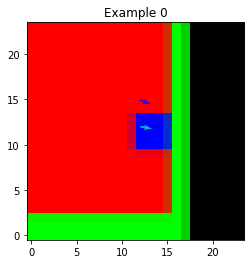

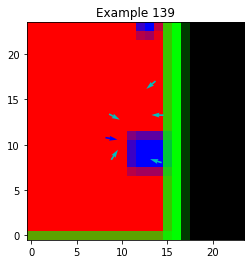

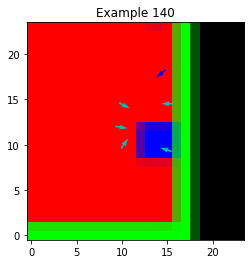

Got 3 examples with non free poses


In [24]:
dataset = GroupDataset('../data/cocktail_party/cocktail_party_test.h5')
print("Loaded {} examples".format(len(dataset)))
count = check_not_free(dataset)
print("Got {} examples with non free poses".format(count))

## Check CP train

Loading ../data/cocktail_party/cocktail_party_train.h5
Loaded 1394 examples


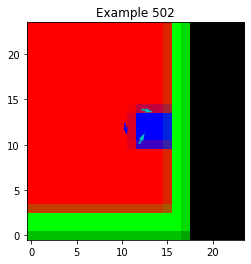

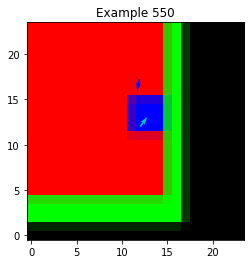

Got 2 examples with non free poses


In [25]:
dataset = GroupDataset('../data/cocktail_party/cocktail_party_train.h5')
print("Loaded {} examples".format(len(dataset)))
count = check_not_free(dataset)
print("Got {} examples with non free poses".format(count))

## Check iGibson

In [34]:
IGIBSON_H5="data/igibson_sim_data/env_Beechwood_0_int.h5 \
data/igibson_sim_data/env_Beechwood_1_int.h5 \
data/igibson_sim_data/env_Benevolence_1_int.h5 \
data/igibson_sim_data/env_Ihlen_0_int.h5 \
data/igibson_sim_data/env_Ihlen_1_int.h5 \
data/igibson_sim_data/env_Merom_1_int.h5 \
data/igibson_sim_data/env_Pomaria_1_int.h5 \
data/igibson_sim_data/env_Pomaria_2_int.h5 \
data/igibson_sim_data/env_Rs_int.h5 \
data/igibson_sim_data/env_Wainscott_0_int.h5 \
data/igibson_sim_data/env_Wainscott_1_int.h5 \
data/igibson_sim_data/env_Merom_0_int.h5 \
data/igibson_sim_data/env_Benevolence_2_int.h5 \
data/igibson_sim_data/env_Benevolence_0_int.h5 \
data/igibson_sim_data/env_Pomaria_0_int.h5"

for igibson_path in IGIBSON_H5.split():
    dataset = GroupDataset("../" + igibson_path)
    count = check_not_free(dataset)
    print("Got {}/{} examples with non free poses".format(count, len(dataset)))

Loading ../data/igibson_sim_data/env_Beechwood_0_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Beechwood_1_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Benevolence_1_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Ihlen_0_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Ihlen_1_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Merom_1_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Pomaria_1_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Pomaria_2_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Rs_int.h5
Got 0/1942 examples with non free poses
Loading ../data/igibson_sim_data/env_Wainscott_0_int.h5
Got 0/3000 examples with non free poses
Loading ../data/igibson_sim_data/env_Wainscott_1_int.h5
Got 0/3

In [35]:
WARPED_H5="data/igibson_sim_data/env_Beechwood_0_int_warped.h5 \
data/igibson_sim_data/env_Beechwood_1_int_warped.h5 \
data/igibson_sim_data/env_Benevolence_1_int_warped.h5 \
data/igibson_sim_data/env_Ihlen_0_int_warped.h5 \
data/igibson_sim_data/env_Ihlen_1_int_warped.h5 \
data/igibson_sim_data/env_Merom_1_int_warped.h5 \
data/igibson_sim_data/env_Pomaria_1_int_warped.h5 \
data/igibson_sim_data/env_Pomaria_2_int_warped.h5 \
data/igibson_sim_data/env_Rs_int_warped.h5 \
data/igibson_sim_data/env_Wainscott_0_int_warped.h5 \
data/igibson_sim_data/env_Wainscott_1_int_warped.h5 \
data/igibson_sim_data/env_Merom_0_int_warped.h5 \
data/igibson_sim_data/env_Benevolence_2_int_warped.h5 \
data/igibson_sim_data/env_Pomaria_0_int_warped.h5"

for igibson_path in WARPED_H5.split():
    dataset = GroupDataset("../" + igibson_path)
    count = check_not_free(dataset)
    print("Got {}/{} examples with non free poses".format(count, len(dataset)))

Loading ../data/igibson_sim_data/env_Beechwood_0_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Beechwood_1_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Benevolence_1_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Ihlen_0_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Ihlen_1_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Merom_1_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Pomaria_1_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Pomaria_2_int_warped.h5
Got 0/2399 examples with non free poses
Loading ../data/igibson_sim_data/env_Rs_int_warped.h5
Got 0/1341 examples with non free poses
Loading ../data/igibson_sim_data/env_Wainscott_0_int_warped.h5
Got 0/2399 examples with non free